<a href="https://colab.research.google.com/github/kazuma313/LicensePlateRecognition/blob/main/LicensePlateRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://github.com/kazuma313/LicensePlateRecognition/archive/refs/heads/main.zip

--2023-10-25 16:49:48--  https://github.com/kazuma313/LicensePlateRecognition/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/kazuma313/LicensePlateRecognition/zip/refs/heads/main [following]
--2023-10-25 16:49:48--  https://codeload.github.com/kazuma313/LicensePlateRecognition/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [  <=>               ]   9.00M  33.9MB/s    in 0.3s    

2023-10-25 16:49:48 (33.9 MB/s) - ‘main.zip’ saved [9433301]



In [ ]:
!unzip main.zip

Archive:  main.zip
e0c1cca8ae7bd59d239b00d336558fc9557d67f9
   creating: LicensePlateRecognition-main/
 extracting: LicensePlateRecognition-main/README.md  
   creating: LicensePlateRecognition-main/dataset/
   creating: LicensePlateRecognition-main/dataset/platGray/
  inflating: LicensePlateRecognition-main/dataset/platGray/E1129RP.jpg  
  inflating: LicensePlateRecognition-main/dataset/platGray/E1169PY.jpg  
  inflating: LicensePlateRecognition-main/dataset/platGray/E1245RG.jpg  
  inflating: LicensePlateRecognition-main/dataset/platGray/E1267RB.jpg  
  inflating: LicensePlateRecognition-main/dataset/platGray/E1477RB.jpg  
  inflating: LicensePlateRecognition-main/dataset/platGray/E1677PE.jpg  
  inflating: LicensePlateRecognition-main/dataset/platGray/E1707PH.jpg  
  inflating: LicensePlateRecognition-main/dataset/platGray/E1893PQ.jpg  
  inflating: LicensePlateRecognition-main/dataset/platGray/E1992RN.jpg  
  inflating: LicensePlateRecognition-main/dataset/platGray/E2035SO.jpg  
  

In [ ]:

# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title("folder name : {}\n file name: {}".format(target_class, random_image[0]))
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (416, 416, 3)


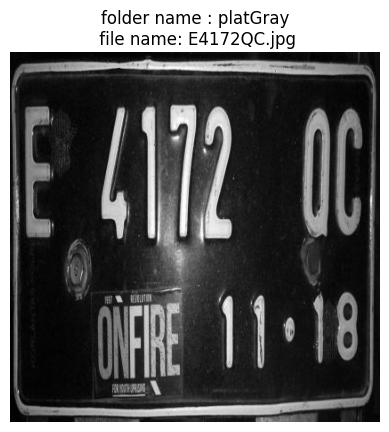

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="/content/LicensePlateRecognition-main/dataset/",
                        target_class="platGray")

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

import tensorflow as tf

In [ ]:
print(tf.__version__)

2.14.0


In [ ]:
dataset, vocab, max_len = [], set(), 0

In [ ]:
data_dir = os.path.join("LicensePlateRecognition-main", "dataset", "platGray")

In [ ]:
# labels= []
for file in os.listdir(data_dir):
  file_path = os.path.join(data_dir, file)
  label = os.path.splitext(file)[0]
  # labels.append(label)
  print(label)
  max_len = max(max_len, len(label))

In [ ]:
X, y, labels = [], [], []
for file in os.listdir(data_dir):
  file_path = os.path.join(data_dir, file)
  label = os.path.splitext(file)[0]
  # img = cv2.imread(file_path)
  # X.append(img)
  X.append(file_path)
  while len(label) != max_len:
    label += " "
  y.append(list(label))
  # dataset.append([file_path, label])
  labels.append(label)
  vocab.update(list(label))
  max_len = max(max_len, len(label))

In [ ]:
max_len

8

In [ ]:
base_character = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789 ")

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
le.fit(base_character)

LabelEncoder()

In [ ]:
le.classes_

array([' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B',
       'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O',
       'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'], dtype='<U1')

In [ ]:
y = np.array([le.transform(i) for i in y])

In [ ]:
imgs = []
for img_path in X:
    img = tf.io.read_file(img_path)
    # 2. Decode and convert to grayscale
    img = tf.io.decode_png(img, channels=1)
    # print(img)
    # 3. Convert to float32 in [0, 1] range
    img = tf.image.convert_image_dtype(img, tf.float32)
    # 4. Resize to the desired size
    img = tf.image.resize(img, [224, 224])
    # 5. Transpose the image because we want the time
    # dimension to correspond to the width of the image.
    img = tf.transpose(img, perm=[1, 0, 2])

    imgs.append(img)

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
X_train, X_test, y_train, y_test = train_test_split(imgs, y, test_size=0.1, random_state=22)

In [ ]:
# from sklearn.model_selection import train_test_split
# import pandas as pd
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=22)
# # X_train, X_test, y_train, y_test = train_test_split(X, np.array(y), test_size=0.1, random_state=22)

# X_train_dataset = pd.DataFrame({"input":X_train})
# Y_train_dataset = pd.DataFrame(y_train)
# train_dataset = pd.concat([X_train_dataset, Y_train_dataset], axis=1)

# X_val_dataset = pd.DataFrame({"input":X_test})
# Y_val_dataset = pd.DataFrame(y_test)
# val_dataset = pd.concat([X_val_dataset, Y_val_dataset], axis=1)

# # train_dataset.shape, val_dataset.shape

In [ ]:
# train_dataset.head()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [ ]:
# train_datagen = ImageDataGenerator(rescale=1./255)
# val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# list(train_dataset.iloc[:,1:].head().columns)

In [ ]:
# train_data = train_datagen.flow_from_dataframe(train_dataset,
#                                                x_col="input",
#                                                y_col= list(train_dataset.iloc[:,1:].head().columns),
#                                                target_size=(224, 224),
#                                                class_mode="raw",
#                                                seed=22)

# val_data = val_datagen.flow_from_dataframe(val_dataset,
#                                            x_col="input",
#                                                y_col=list(val_dataset.iloc[:,1:].head().columns),
#                                                target_size=(224, 224),
#                                                class_mode="raw",
#                                                seed=22)


In [ ]:
# image, label = train_data.next()

In [ ]:
# label[0]

In [ ]:
#  len_output = np.shape(label[0])[0]
#  len_output

In [ ]:
# image[0].shape

In [ ]:
def convert_to_dict(img, label):
    return {"image": img, "label": label}

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = (
    train_dataset.map(
        convert_to_dict, num_parallel_calls=tf.data.AUTOTUNE
    )
    .batch(2)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)


val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
val_dataset = (
    val_dataset.map(
        convert_to_dict, num_parallel_calls=tf.data.AUTOTUNE
    )
    .batch(2)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
class CTCLayer(layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        # Compute the training-time loss value and add it
        # to the layer using `self.add_loss()`.
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions
        return y_pred




In [ ]:
len(base_character)

37

In [ ]:
type(train_dataset)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [ ]:

def build_model():
    # Inputs to the model
    input_img = layers.Input(
        shape=(224, 224, 1), name="image", dtype="float32"
    )
    labels = layers.Input(name="label", shape=(None,), dtype="float32")

    # First conv block
    x = layers.Conv2D(
        32,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv1",
    )(input_img)
    x = layers.MaxPooling2D((2, 2), name="pool1")(x)

    # Second conv block
    x = layers.Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv2",
    )(x)
    x = layers.MaxPooling2D((2, 2), name="pool2")(x)

    # We have used two max pool with pool size and strides 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing the output to the RNN part of the model
    new_shape = ((224 // 4), (224 // 4) * 64)
    x = layers.Reshape(target_shape=new_shape, name="reshape")(x)
    x = layers.Dense(64, activation="relu", name="dense1")(x)
    x = layers.Dropout(0.2)(x)

    # RNNs
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)

    # Output layer
    x = layers.Dense(
        len(base_character) + 1, activation="softmax", name="dense2"
    )(x)

    # Add CTC layer for calculating CTC loss at each step
    output = CTCLayer(name="ctc_loss")(labels, x)

    # Define the model
    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name="ocr_model_v1"
    )
    # Optimizer
    opt = keras.optimizers.Adam()
    # Compile the model and return
    model.compile(optimizer=opt)
    return model


# Get the model
model = build_model()
model.summary()

Model: "ocr_model_v1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 image (InputLayer)          [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 224, 224, 32)         320       ['image[0][0]']               
                                                                                                  
 pool1 (MaxPooling2D)        (None, 112, 112, 32)         0         ['Conv1[0][0]']               
                                                                                                  
 Conv2 (Conv2D)              (None, 112, 112, 64)         18496     ['pool1[0][0]']               
                                                                                       

In [ ]:
epochs = 15
early_stopping_patience = 5
# Add early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=early_stopping_patience, restore_best_weights=True
)

chackpoint_path= "checkpoint_weight/checkpoint.ckpt"

checkpoint_callback= tf.keras.callbacks.ModelCheckpoint(filepath=chackpoint_path,
                                                        save_weights_only=True,
                                                        save_best_only=True,
                                                        save_freq="epoch",
                                                        verbose=1)


In [ ]:

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    callbacks=[early_stopping, checkpoint_callback],
)

Epoch 1/15
167/167 [==============================] - ETA: 0s - loss: 27.5784
Epoch 1: val_loss improved from inf to 20.82171, saving model to checkpoint_weight/checkpoint.ckpt
167/167 [==============================] - 59s 290ms/step - loss: 27.5784 - val_loss: 20.8217
Epoch 2/15
167/167 [==============================] - ETA: 0s - loss: 19.9812
Epoch 2: val_loss improved from 20.82171 to 18.85218, saving model to checkpoint_weight/checkpoint.ckpt
167/167 [==============================] - 47s 279ms/step - loss: 19.9812 - val_loss: 18.8522
Epoch 3/15
167/167 [==============================] - ETA: 0s - loss: 18.6096
Epoch 3: val_loss improved from 18.85218 to 17.91462, saving model to checkpoint_weight/checkpoint.ckpt
167/167 [==============================] - 46s 274ms/step - loss: 18.6096 - val_loss: 17.9146
Epoch 4/15
167/167 [==============================] - ETA: 0s - loss: 17.9575
Epoch 4: val_loss improved from 17.91462 to 17.35703, saving model to checkpoint_weight/checkpoint.

In [ ]:
prediction_model = keras.models.Model(
    model.get_layer(name="image").input, model.get_layer(name="dense2").output
)
prediction_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 224, 224, 1)]     0         
                                                                 
 Conv1 (Conv2D)              (None, 224, 224, 32)      320       
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 32)      0         
                                                                 
 Conv2 (Conv2D)              (None, 112, 112, 64)      18496     
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 64)        0         
                                                                 
 reshape (Reshape)           (None, 56, 3584)          0         
                                                                 
 dense1 (Dense)              (None, 56, 64)            229440

In [ ]:
image =train_dataset.take(1)

In [ ]:
for batch in val_dataset.take(1):
    batch_images = batch["image"]
    batch_labels = batch["label"]

In [ ]:
batch_images[1].shape

TensorShape([224, 224, 1])

In [ ]:
batch_images.shape

TensorShape([2, 224, 224, 1])

In [ ]:
pred = prediction_model.predict(tf.expand_dims(batch_images[1], axis=0))
input_len = np.ones(pred.shape[0]) * pred.shape[1]

results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][:, :max_len]

results = np.squeeze(results)

1/1 [==============================] - 0s 58ms/step


In [ ]:
convert_result = np.array([le.inverse_transform([i]) for i in results if i != -1])
print(np.squeeze(convert_result))

['E' '4' '5' 'S' 'A' ' ']


In [ ]:
img = (batch_images[1, :, :, 0] * 255).numpy().astype(np.uint8).T
img

array([[ 23,  33,  69, ..., 141, 145, 126],
       [ 23,  37,  71, ..., 132, 135, 131],
       [ 23,  44,  69, ..., 134, 132, 143],
       ...,
       [ 64,  61,  59, ...,  43,  48,  48],
       [ 62,  69,  72, ...,  55,  61,  60],
       [105,  83, 109, ...,  68,  73,  68]], dtype=uint8)

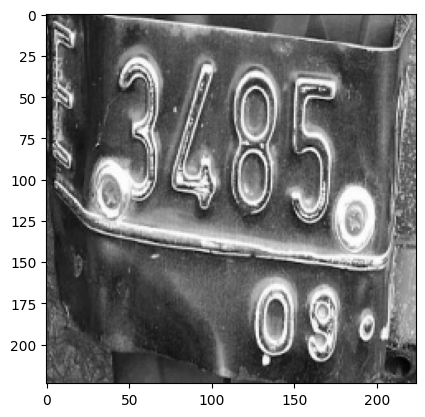

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img, cmap="gray")